In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from skimage.transform import resize

In [127]:
def classification(img):
    categories = ['Chaunsa (White)','Dosehri','Langra']
    x = open("classification_model.pkl","rb")
    model=pickle.load(x)
    x.close()
    img_resize=cv2.resize(img,(50,50))
    l=[np.array(img_resize).flatten()]
    probability=model.predict_proba(l)
    for ind,val in enumerate(categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+categories[model.predict(l)[0]])
    return (categories[model.predict(l)[0]])

In [128]:
def regression(variety,market,district,state,arrival_date):
  if variety == 'Dosehri':
     variety = 'Dusheri'

  arrival_date = int(arrival_date[3:5])
  
  pickle_in = open("district.pickle","rb")
  district_mapping = pickle.load(pickle_in)

  pickle_in = open("market.pickle","rb")
  market_mapping = pickle.load(pickle_in)
  
  pickle_in = open("state.pickle","rb")
  state_mapping = pickle.load(pickle_in)
  
  pickle_in = open("variety.pickle","rb")
  variety_mapping = pickle.load(pickle_in)

  variety=variety_mapping[variety]
  district=district_mapping[district]
  state=state_mapping[state]
  market=market_mapping[market]

  data=[state,variety,arrival_date,market,district]
  x = open("/content/standard_scaler.pkl","rb")
  scaler=pickle.load(x)
  x.close()
  data=scaler.transform([data])
  
  x = open("/content/knn_regression_model.pkl","rb")
  model_knn=pickle.load(x)
  x.close()
  price_predicted=model_knn.predict(data)
  
  return price_predicted

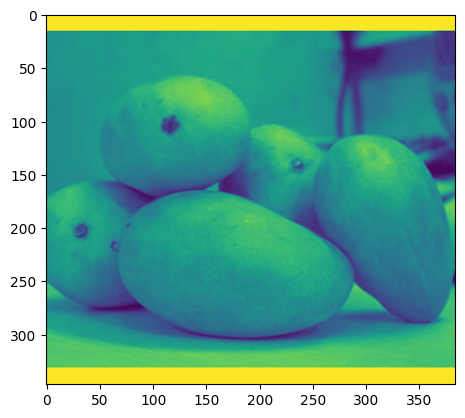

In [129]:
path='/content/dosehri_test.jpg'
img = cv2.imread(path,0)
plt.imshow(img)
plt.show()

In [130]:
market = input('Enter market: ')
district = input('Enter district: ')
state = input('Enter state: ')
arrival_date = input('Enter date in dd/mm/yyyy: ')

Enter market: Ladwa
Enter district: Kurukshetra
Enter state: Haryana
Enter date in dd/mm/yyyy: 03/05/2022


In [131]:
variety = classification(img)
price = regression(variety,market,district,state,arrival_date)

print("The image given was of a {} mango and the price for it as per the specifications entered should be approximately {}".format(variety,price))

Chaunsa (White) = 31.07308438313567%
Dosehri = 68.27802965337798%
Langra = 0.6488859634863244%
The predicted image is : Dosehri
The image given was of a Dosehri mango and the price for it as per the specifications entered should be approximately [2987.5]
